In [3]:
'''초기 세팅'''
import pandas as pd
import matplotlib.pyplot as plt #matplotlib 라이브러리
import seaborn as sns #seaborn 라이브러리
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

# 한글 폰트 입력
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [11]:
'''데이터 불러오기'''

import pandas as pd

sm = pd.read_csv('data/시군구_사망원인_50항목__성__사망자수__사망률__연령표준화_사망률_1998__20250131104736.csv', encoding = 'cp949')
sm

,사망원인별(50항목),시군구별,성별,2019,2020,2021,2022,2023
0,사망원인별(50항목),시군구별,성별,사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명),사망자수 (명)
1,호흡기 결핵 (A15-A16),전국,계,1492,1223,1324,1223,1227
2,패혈증 (A40-A41),전국,계,4903,6086,6429,6928,7809
3,악성신생물(암) (C00-C97),전국,계,81203,82204,82688,83378,85271
4,식도의 악성신생물 (C15),전국,계,1554,1564,1569,1618,1612
5,위의 악성신생물 (C16),전국,계,7624,7510,7249,7147,7229
6,"결장, 직장 및 항문의 악성신생물 (C18-C21)",전국,계,8966,8944,8984,9164,9348
7,간 및 간내 담관의 악성신생물 (C22),전국,계,10586,10565,10255,10212,10136
8,췌장의 악성신생물 (C25),전국,계,6396,6775,6931,7325,7693
9,"기관, 기관지 및 폐의 악성신생물 (C33-C34)",전국,계,18574,18673,18902,18584,18646


In [12]:
'''전처리'''

# 불필요한 첫 번째 행 제거 (컬럼 설명 행)
sm = sm.iloc[1:].copy()

# 컬럼명 수정
sm.columns = ["사망원인", "지역", "성별", "2019", "2020", "2021", "2022", "2023"]

# 2023년도 데이터만 선택 & 전국 데이터만 남김
sm_filtered = sm[sm["지역"] == "전국"].copy()

# 2023년도 사망자 수를 정수형으로 변환
sm_filtered["2023"] = pd.to_numeric(sm_filtered["2023"], errors="coerce")

# 사망원인에서 괄호 및 질병 코드 제거
sm_filtered["사망원인"] = sm_filtered["사망원인"].apply(lambda x: re.sub(r"\s*\(.*?\)", "", x))

# "기타"가 포함된 값 제거
sm_filtered = sm_filtered[~sm_filtered["사망원인"].str.contains("기타", "노쇠", na=False)]

# 사망자 수 기준 상위 30개 원인 선택
sm_top20 = sm_filtered.nlargest(30, "2023")

# 사망 원인 목록
top20_keywords = sm_top20["사망원인"].tolist()

# 상위 30개 사망 원인 테이블 출력
df_top20_keywords = pd.DataFrame({"사망 원인": top20_keywords, "사망자 수": sm_top20["2023"].tolist()})
print(df_top20_keywords.to_string(index=False))  # 콘솔에서 깔끔하게 출력

                         사망 원인  사망자 수
                         악성신생물  85271
                         심장 질환  33147
                            폐렴  29422
                        뇌혈관 질환  24194
                            노쇠  20655
            기관, 기관지 및 폐의 악성신생물  18646
                     허혈성 심장 질환  14028
                        고의적 자해  13978
                        알츠하이머병  11109
                           당뇨병  11058
                    비뇨생식계통의 질환  10308
              간 및 간내 담관의 악성신생물  10136
            결장, 직장 및 항문의 악성신생물   9348
                       고혈압성 질환   7988
                           패혈증   7809
                     췌장의 악성신생물   7693
                          간 질환   7263
                      위의 악성신생물   7229
                     만성 하기도 질환   6299
                     정신 및 행동장애   4181
                          운수사고   3287
                     유방의 악성신생물   2849
                    전립선의 악성신생물   2594
                            낙상   2509
                           백혈병   2162
            

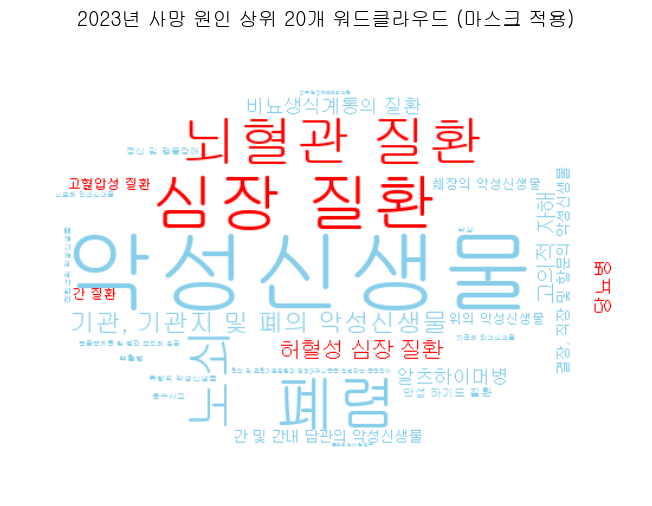

In [10]:
# 특정 키워드 강조 (빨간색)
highlight_keywords = ["당뇨병", "기타 심장 질환", "허혈성 심장 질환", "심장 질환", "뇌혈관 질환", "간 질환", "고혈압성 질환"]

# 워드클라우드 데이터 준비
word_freq = dict(zip(sm_top20["사망원인"], sm_top20["2023"]))

# 색상 함수 설정
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if any(keyword in word for keyword in highlight_keywords):
        return "red"  # 특정 키워드는 빨간색
    return "skyblue"  # 나머지는 파란색

# 마스크 이미지 로드
mask = np.array(Image.open("./img/wcmask.png"))  # 마스크 이미지 경로 설정

# 한글 폰트 설정 ('gulim.ttc' 사용)
font_path = "./gulim.ttc"  # Windows 사용자는 'gulim.ttc', Mac/Linux는 'NanumGothic.ttf' 변경 가능

# 워드클라우드 생성 (마스크 적용)
wordcloud = WordCloud(
    font_path=font_path,
    mask=mask,  # 마스크 이미지 적용
    background_color="white",
    width=800,
    height=600,
    color_func=color_func
).generate_from_frequencies(word_freq)

# 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("2023년 사망 원인 상위 20개 워드클라우드 (마스크 적용)", fontsize=14, fontname="Gulim")
plt.show()


In [75]:
# PNG 파일로 저장
wordcloud.to_file("word cloud.png")